# Artificial dataset generation

In this exercise, we must generate a 300 lines dataset with column requirements

In [174]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

In [175]:
# Initialize random seed for reproducibility
random.seed(0)
np.random.seed(0)

In [176]:
# Generate 300 data points with 3 columns
data = []
for _ in range(300):
    row = [
        random.randint(1, 10),  # Integer column
        np.random.normal(2.5, 1),  # Float column with mean close to 2.5
        np.random.normal(5, 2),  # Different mean and std dev
        np.random.normal(10, 5),  # Different mean and std dev
    ]
    data.append(row)

In [177]:
# Add correlation between some columns
for row in data:
    row.append(row[2] + np.random.normal(0, 0.5))  # Positively correlated with column 3
    row.append(20 - row[3] + np.random.normal(0, 0.5))  # Negative correlation with column 4

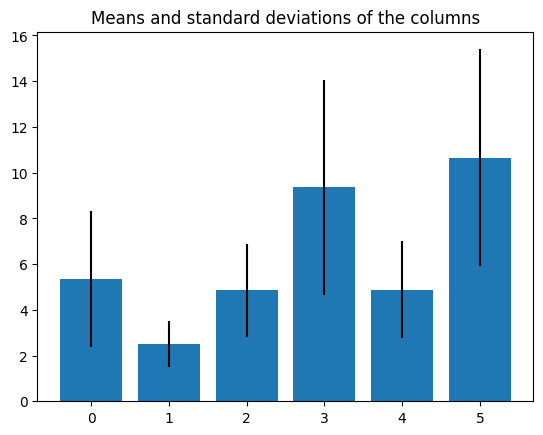

In [178]:
# Show the means and standard deviations of the columns
data_array = np.array(data)
means = np.mean(data_array, axis=0)
std_devs = np.std(data_array, axis=0)
plt.title('Means and standard deviations of the columns')
plt.bar(range(len(means)), means, yerr=std_devs)
plt.show()

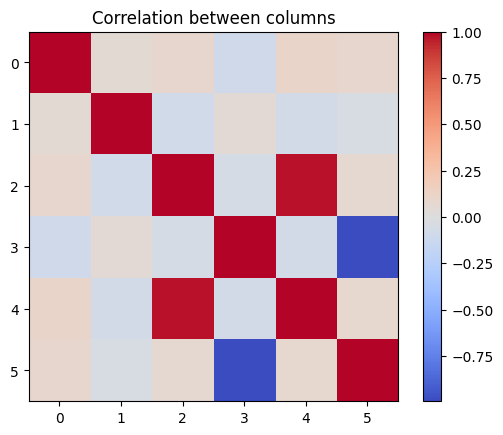

In [179]:
# Show the correlation between columns
correlation = np.corrcoef(data, rowvar=False)
plt.title("Correlation between columns")
plt.imshow(correlation, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.show()

In [180]:
# Save the dataset to a CSV file
with open('artificial_dataset.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

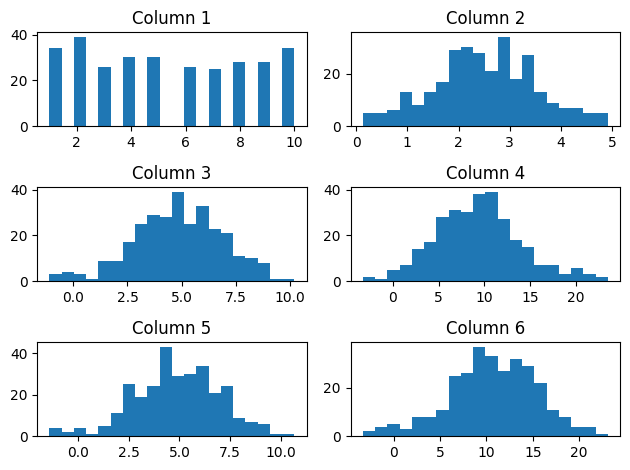

In [181]:
# Show the data of each column in graphical form
fig, axs = plt.subplots(3, 2)

def plot_column(ax, column, title):
  ax.set_title(title)
  ax.hist(column, bins=20)

plot_column(axs[0, 0], data_array[:, 0], 'Column 1')
plot_column(axs[0, 1], data_array[:, 1], 'Column 2')
plot_column(axs[1, 0], data_array[:, 2], 'Column 3')
plot_column(axs[1, 1], data_array[:, 3], 'Column 4')
plot_column(axs[2, 0], data_array[:, 4], 'Column 5')
plot_column(axs[2, 1], data_array[:, 5], 'Column 6')

plt.tight_layout()
plt.show()